<a href="https://colab.research.google.com/github/AliShujjat/DSProject/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu/Edu2.csv" "Edu2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from matplotlib import pyplot

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

In [147]:
df = pd.read_csv('Edu2.csv')

In [148]:
performance = {"Model":[], "Accuracy":[]};

# Preprocessing

In [149]:
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Education Status of Child,Edu status,Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007
0,0,19,1.0,2,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0
1,1,19,3.0,0,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
2,2,19,3.0,0,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
3,3,19,3.0,0,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0
4,4,19,3.0,0,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0


In [150]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Education Status of Child')) #Remove b from list
cols.pop(cols.index('Edu status')) #Remove x from list
df = df[cols+['Education Status of Child','Edu status']] #Create new dataframe with columns in the order you want
df.drop('Edu status', inplace=True, axis=1)
df["Education Status of Child"].replace({1: 2}, inplace=True)
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007,Education Status of Child
0,0,19,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,2.0
1,1,19,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0
2,2,19,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0
3,3,19,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0,3.0
4,4,19,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,3.0


In [151]:
len(df.columns)

30

In [152]:
df = df.values

In [153]:
print(X.shape)

(260186, 29)


In [154]:

#Normalization
scaler = MinMaxScaler(feature_range=(0,1))
newX = scaler.fit_transform(X)
scaler.transform(newX)

display(newX)

#split into source and target
X, y = df[:,:-1], df[:,-1]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33)

array([[0.00000000e+00, 6.55172414e-01, 1.66666667e-01, ...,
        3.33333333e-01, 0.00000000e+00, 4.00000000e-01],
       [3.84341911e-06, 6.55172414e-01, 1.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 4.00000000e-01],
       [7.68683821e-06, 6.55172414e-01, 1.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 4.00000000e-01],
       ...,
       [9.99992313e-01, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 3.33333333e-01, 0.00000000e+00],
       [9.99996157e-01, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 3.33333333e-01, 0.00000000e+00],
       [1.00000000e+00, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 3.33333333e-01, 0.00000000e+00]])

# Logistic Regression

In [155]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation metrics of logistic regression classifier:  0.8410938482681513
[[16751  7446]
 [ 6198 55467]]
              precision    recall  f1-score   support

         2.0       0.73      0.69      0.71     24197
         3.0       0.88      0.90      0.89     61665

    accuracy                           0.84     85862
   macro avg       0.81      0.80      0.80     85862
weighted avg       0.84      0.84      0.84     85862



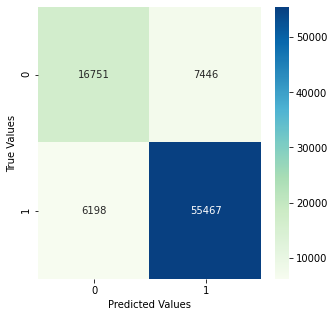

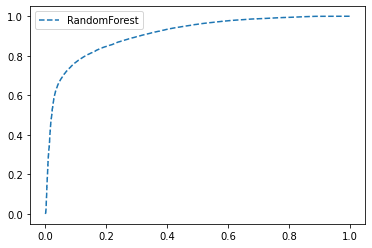

In [156]:
y_pred = logreg.predict(X_test)

#Evaluate
score = logreg.score(X_test, y_test)
print("Evaluation metrics of logistic regression classifier: ", score)
performance['Model'].append('Logistic Regression')
performance['Accuracy'].append(score)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

#ROC Plot
y_probs = logreg.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='RandomForest')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Naive Bayes

Naive Bayes Classification Score: 0.7597656704945145


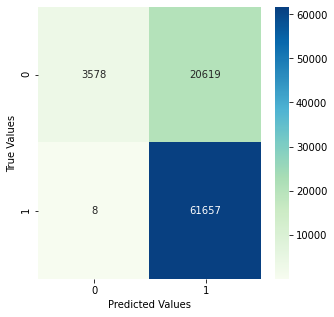

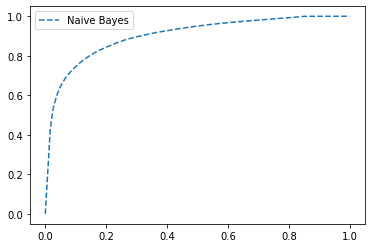

In [157]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
score = naive_bayes.score(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(score))

performance['Model'].append('Naive Bayes')
performance['Accuracy'].append(score)

y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = naive_bayes.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive Bayes')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Decision Tree

Evaluation metrics of decision tree classifier:  0.9082015326919941
[[20426  3771]
 [ 4111 57554]]
              precision    recall  f1-score   support

         2.0       0.83      0.84      0.84     24197
         3.0       0.94      0.93      0.94     61665

    accuracy                           0.91     85862
   macro avg       0.89      0.89      0.89     85862
weighted avg       0.91      0.91      0.91     85862



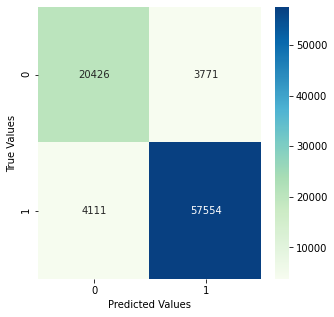

Sensitivity:  0.8441542339959499
Specificity:  0.9333333333333333


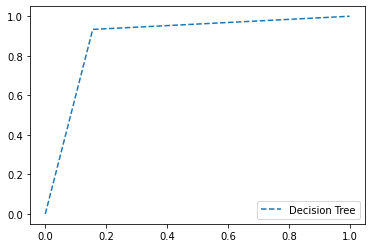

In [158]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
 
y_pred_new = dtc.predict(X_test)
score = dtc.score(X_test,y_test)
print("Evaluation metrics of decision tree classifier: ", score)
 
performance['Model'].append('Decision Tree')
performance['Accuracy'].append(score)

cm = confusion_matrix(y_test, y_pred_new)
print(cm)
print(classification_report(y_test, y_pred_new))
sens = cm[0,0] / (cm[0,0] + cm[0,1])
spec = cm[1,1] / (cm[1,0] + cm[1,1])

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print("Sensitivity: ", sens)
print("Specificity: ", spec)

y_probs = dtc.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Decision Tree')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# K-Nearest Neighbors

Score for Number of Neighbors = 5: 0.8983950991125295


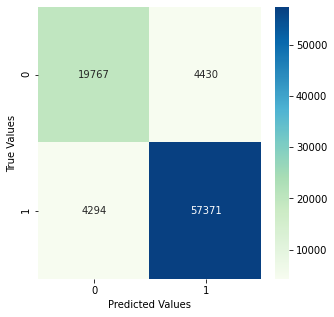

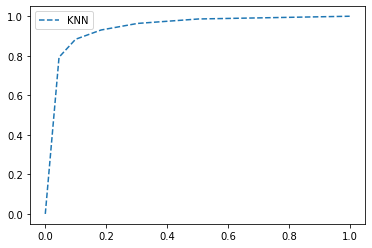

In [159]:


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

score = knn.score(X_test,y_test)
print("Score for Number of Neighbors = 5: {}".format(score))

performance['Model'].append('KNN')
performance['Accuracy'].append(score)

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = knn.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='KNN')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Support Vector Machine

In [144]:


svm = SVC(random_state=42)
svm.fit(X_train,y_train)

score = svm.score(X_test,y_test)
print("SVM Classification Score is: {}".format(score))

performance['Model'].append('SVM')
performance['Accuracy'].append(score)

y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = svm.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='SVM')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

KeyboardInterrupt: ignored

# Artificial Neural Network

In [160]:

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
performance['Model'].append('ANN')
performance['Accuracy'].append(mean)
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.3771 - accuracy: 0.8211
Epoch 2/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.3507 - accuracy: 0.8333
Epoch 3/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.3290 - accuracy: 0.8493
Epoch 4/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.3024 - accuracy: 0.8661
Epoch 5/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.3005 - accuracy: 0.8666
Epoch 6/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.2991 - accuracy: 0.8668
Epoch 7/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.2982 - accuracy: 0.8683
Epoch 8/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.2958 - accuracy: 0.8683
Epoch 9/10
3632/3632 [==============================] - 4s 1ms/step - loss: 0.2911 - accuracy: 0.8715
Epoch 10/10
1816/1816 [==============================] - 2s 833us/step - loss: 0.2

# Random Forest

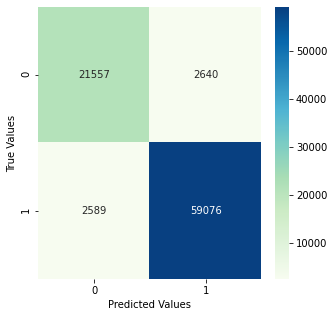

Evaluation metrics of random forest classifier:  0.9390999510842981 

Confusion Matrix: 
 [[21557  2640]
 [ 2589 59076]] 

              precision    recall  f1-score   support

         2.0       0.89      0.89      0.89     24197
         3.0       0.96      0.96      0.96     61665

    accuracy                           0.94     85862
   macro avg       0.93      0.92      0.92     85862
weighted avg       0.94      0.94      0.94     85862



In [161]:

# Instantiate
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

# Import confusion_matrix
from sklearn import metrics

y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print("Evaluation metrics of random forest classifier: ", score,'\n')
performance['Model'].append('Random Forest')
performance['Accuracy'].append(score)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

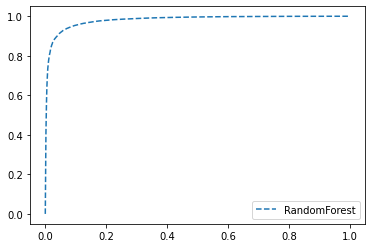

In [162]:
y_probs = clf.predict_proba(X_test)
y_probs = y_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='RandomForest')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

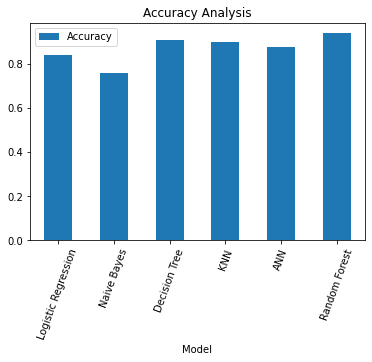

In [166]:
import matplotlib.pyplot as plot
dataFrame = pd.DataFrame(data=performance);

# Draw a vertical bar chart

dataFrame.plot.bar(x="Model", y="Accuracy", rot=70, title="Accuracy Analysis");

plot.show(block=True);